In [2]:
import numpy as np 
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import re
from tqdm.auto import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import matplotlib
# So that we can edit the text in illustrator
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

fig_out_dir = Path("final_figures/figure_4")
fig_out_dir.mkdir(exist_ok=True, parents=True)


In [3]:
remap_azim = lambda azim: 360 - azim if azim > 180 else 0 - azim 


# Read model data



In [4]:
out_dir = Path('final_results_dir')
out_dir.mkdir(parents=True, exist_ok=True)
results = pd.read_csv(out_dir / 'feature_gain_main_v10_all_1_distractor_spatial_configurations_raw.csv')

In [5]:
n_unique_elevations = results.target_elev.nunique()
n_unique_azimuths = results.target_azim.nunique()


# Figure 4a confusion matrices 

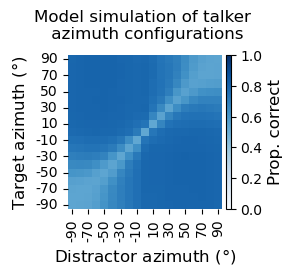

In [6]:
### plot 90 to 90 azimuth, averaging over elevation as heatmap 
fontsize=12
fig, ax = plt.subplots(figsize=(2,2))
azims_to_plot = np.arange(-90, 91, 10)
df_for_azim_heatmap = results[(results.target_azim.isin(azims_to_plot)) & (results.distractor_azim.isin(azims_to_plot))].copy()
acc_to_plot = df_for_azim_heatmap.groupby(['target_azim', "distractor_azim"])['accuracy'].mean().unstack()
acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=ax, square=True,)# linewidths=0.48,  linecolor='k')

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.11, 0.022, 0.77])  # [left, bottom, width, height]

plt.colorbar(acc_heatmap.get_children()[0], cax=cbar_ax_acc)
# increase colorbar label fontsize 
# cbar_ax_acc.tick_params(labelsize=fontsize)
# set colorbar label
cbar_ax_acc.set_ylabel('Prop. correct', fontsize=fontsize)


ax.set_xlabel('Distractor azimuth ($\degree$)', fontsize=fontsize)
ax.set_ylabel('Target azimuth ($\degree$)', fontsize=fontsize)
ax.set_title("Model simulation of talker \n azimuth configurations", y=1.05, fontsize=fontsize)
ax.invert_yaxis()
ax.set_aspect('equal')
# plt.savefig(fig_out_dir / "figure_4_model_azim_summary.pdf", transparent=True, bbox_inches='tight')

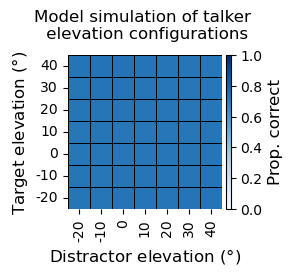

In [ ]:
### plot 90 to 90 azimuth, averaging over elevation as heatmap 
fontsize=12
fig, ax = plt.subplots(figsize=(2,2))
elevs_to_plot = np.arange(-20, 41, 10)
df_for_azim_heatmap = results[(results.target_elev.isin(elevs_to_plot)) & (results.distractor_elev.isin(elevs_to_plot))].copy()
acc_to_plot = df_for_azim_heatmap.groupby(['target_elev', "distractor_elev"])['accuracy'].mean().unstack()
acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=ax, square=True, linewidths=0.5, linecolor='k', robust=True)

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.11, 0.022, 0.77])  # [left, bottom, width, height]

plt.colorbar(acc_heatmap.get_children()[0], cax=cbar_ax_acc)
# increase colorbar label fontsize 
# cbar_ax_acc.tick_params(labelsize=fontsize)
# set colorbar label
cbar_ax_acc.set_ylabel('Prop. correct', fontsize=fontsize)


ax.set_xlabel('Distractor elevation ($\degree$)', fontsize=fontsize)
ax.set_ylabel('Target elevation ($\degree$)', fontsize=fontsize)
ax.set_title("Model simulation of talker \n elevation configurations", y=1.05, fontsize=fontsize)

ax.invert_yaxis()
ax.set_aspect('equal')
# plt.savefig(fig_out_dir / "figure_4_model_elevation_summary.pdf", transparent=True, bbox_inches='tight')

# Supplementary figures 2 and 3

## Sup. Figure 2

/tmp/ipykernel_166673/2905888671.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


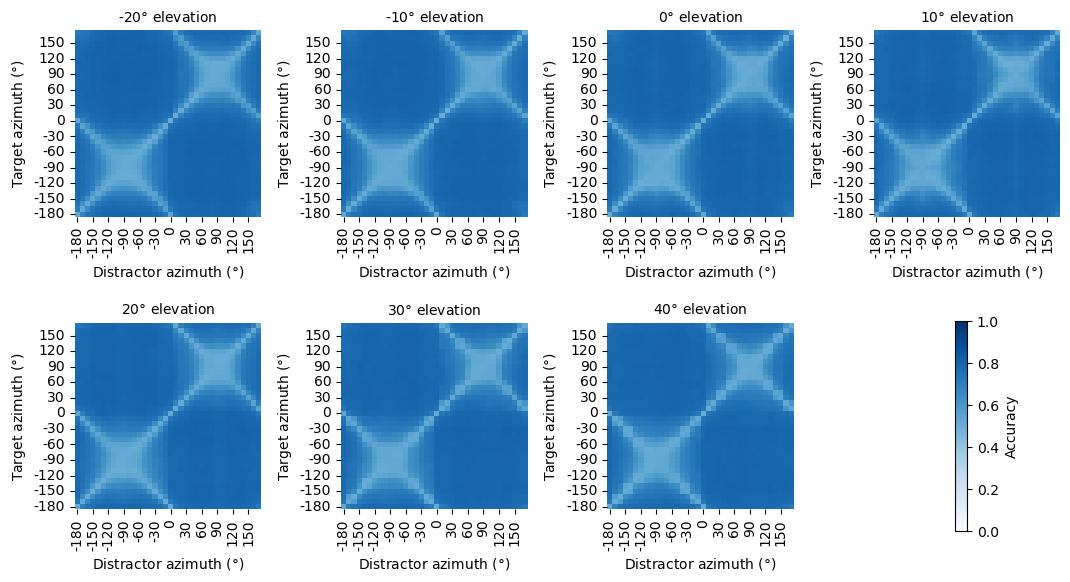

In [ ]:
n_rows = 2  # top row will be accuracy, bottom row will be confusions
n_cols = int(np.ceil(n_unique_elevations / n_rows)) # number of unique elevations

aspect = 3
fontsize = 10

figsize = (n_cols * aspect, n_rows * aspect)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
axes = axes.ravel()
# Create lists to store the heatmaps for adding colorbars later
acc_heatmaps = []
conf_heatmaps = []

for i, elev in enumerate(sorted(results.target_elev.unique())):
    # Get performance where sources are co-located in elevation
    elev_df = results[(results.target_elev == elev) & (results.distractor_elev == elev)]

    acc_to_plot = elev_df.groupby(['target_azim', "distractor_azim"])['accuracy'].mean().unstack()
    acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=axes[i], square=True, )#linewidths=  linecolor='darkgrey')
    acc_heatmaps.append(acc_heatmap)
    axes[i].set_title(f"{elev}$\degree$ elevation", fontsize=fontsize)

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.8, 0.1, 0.01, 0.35])  # [left, bottom, width, height]

plt.colorbar(acc_heatmaps[-1].get_children()[0], cax=cbar_ax_acc, label="Accuracy")

for ax in axes.ravel():
    ax.set_xlabel('Distractor azimuth ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target azimuth ($\degree$)', fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars
# plt.savefig(fig_out_dir / "azim_x_azim_per_elevation.pdf", transparent=True, bbox_inches='tight')

## Sup. Figure 3

/tmp/ipykernel_166673/2831587897.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


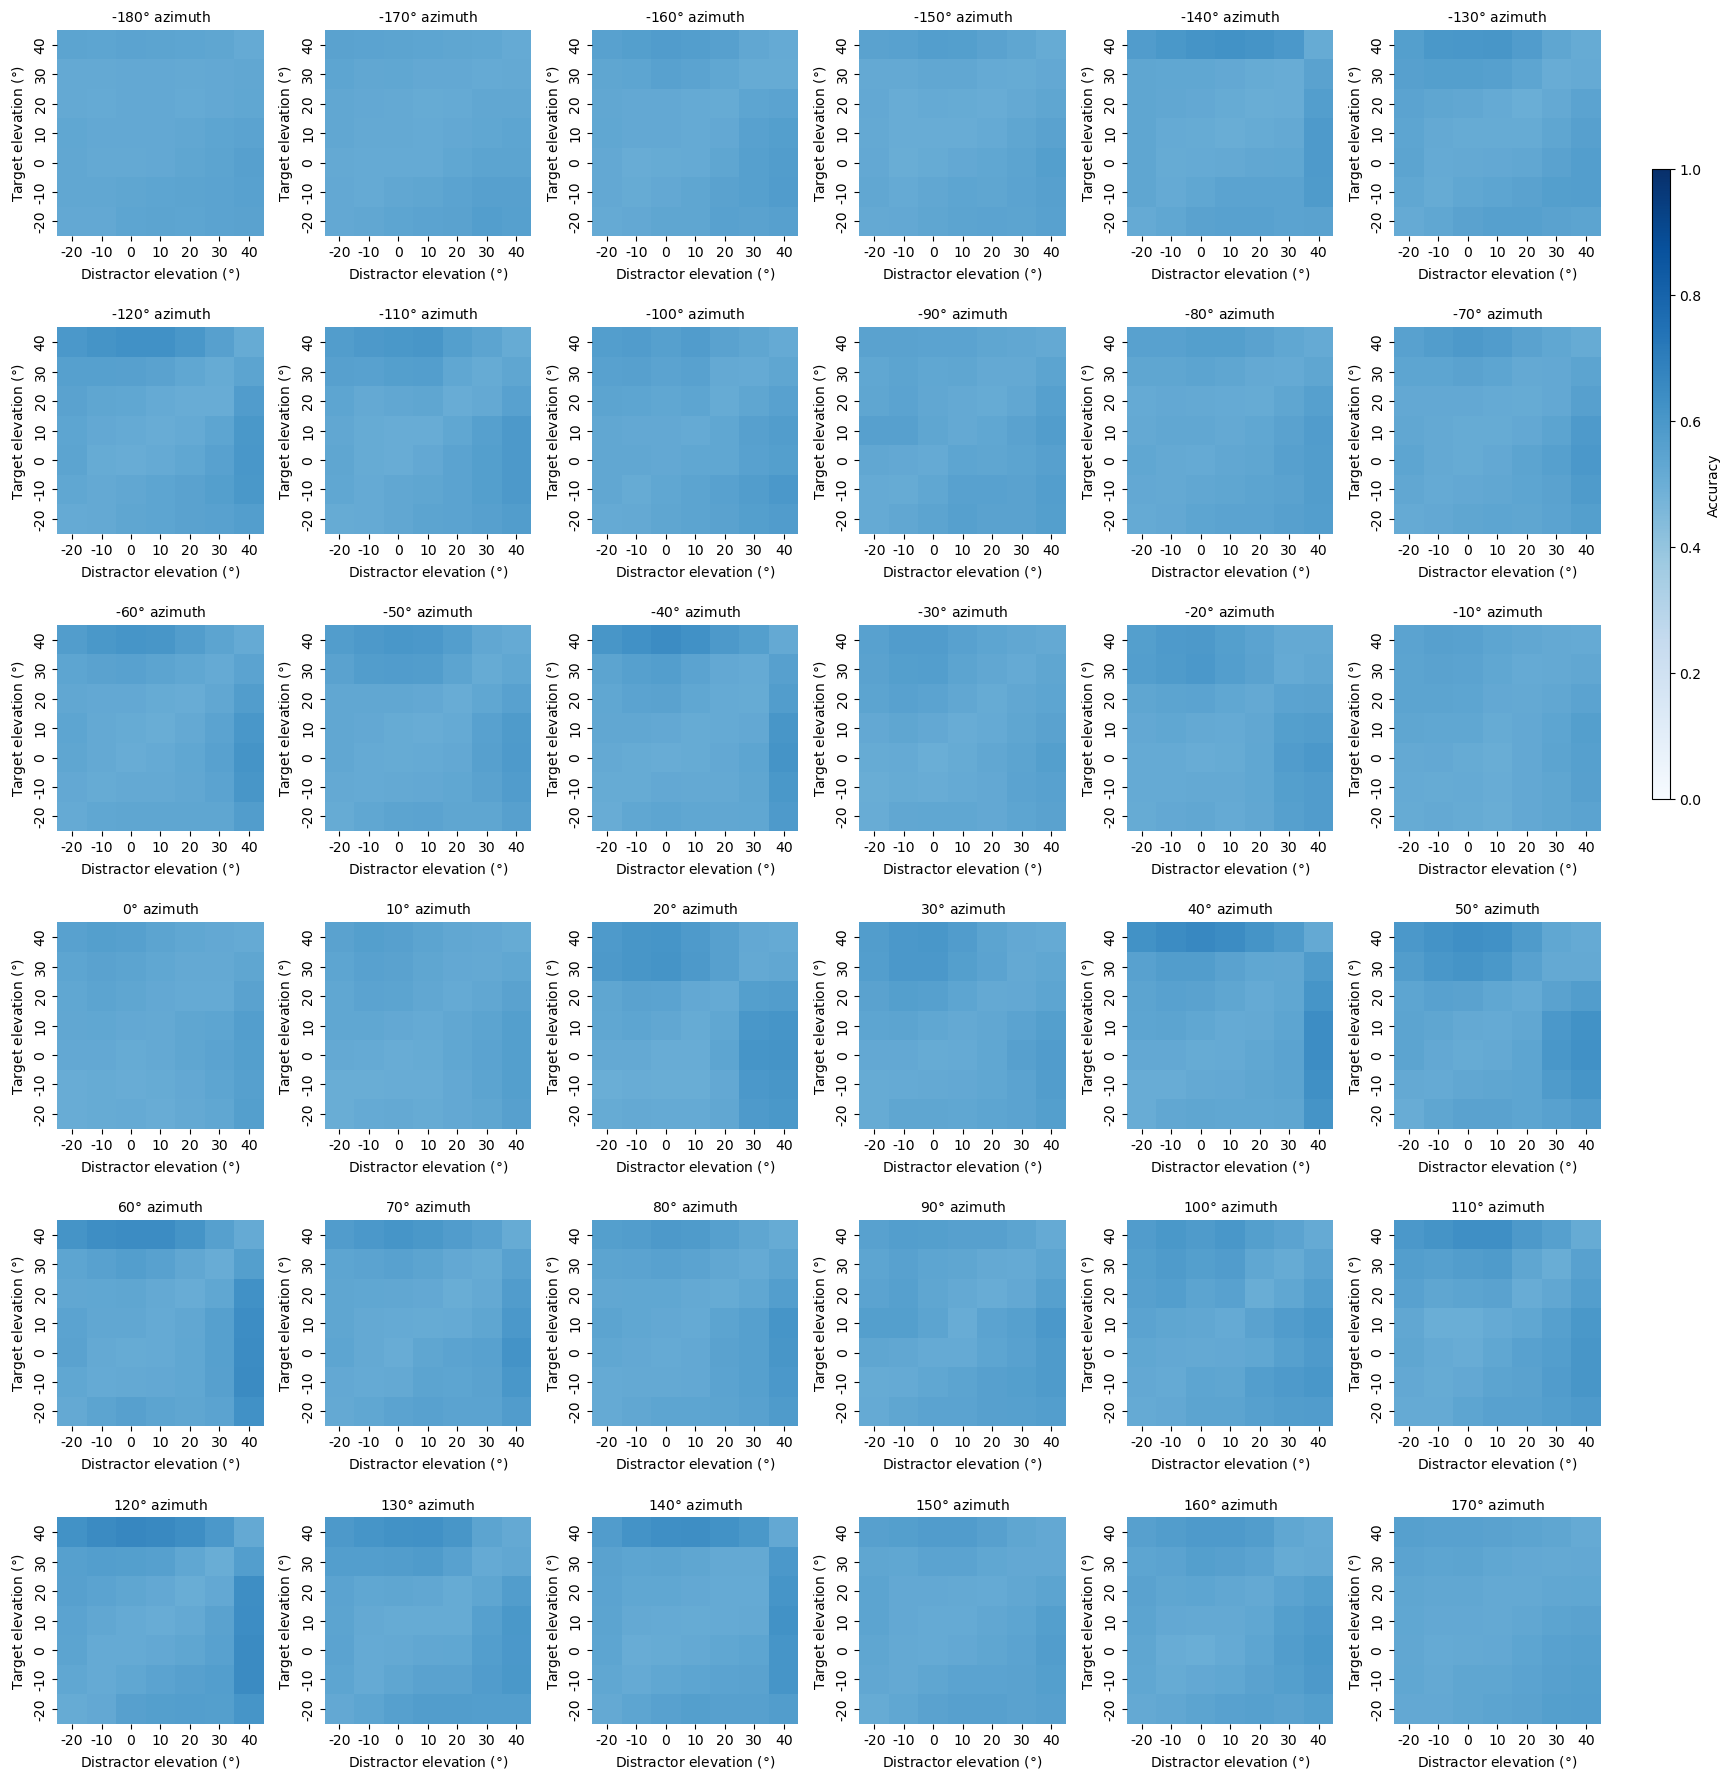

In [ ]:
n_azims = n_unique_azimuths  # number of unique azimuths
n_cols = 6 
n_rows = n_azims // n_cols + (n_azims % n_cols > 0)  # number of rows needed to fit all azimuths

aspect = 3
fontsize = 10

figsize = (n_cols * aspect, n_rows * aspect)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
axes = axes.flatten()
# Create lists to store the heatmaps for adding colorbars later
acc_heatmaps = []
conf_heatmaps = []

for i, azim in enumerate(sorted(results.target_azim.unique())):
    # Get performance where sources are co-located in elevation
    azim_df = results[(results.target_azim == azim) & (results.distractor_azim == azim)]

    acc_to_plot = azim_df.groupby(['target_elev', "distractor_elev"])['accuracy'].mean().unstack()
    acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=axes[i], square=True, robust=True)
    acc_heatmaps.append(acc_heatmap)
    axes[i].set_title(f"{azim}$\degree$ azimuth", fontsize=fontsize)
    

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.92, 0.55, 0.01, 0.35])  # [left, bottom, width, height]

plt.colorbar(acc_heatmaps[0].get_children()[0], cax=cbar_ax_acc, label="Accuracy")
# plt.colorbar(conf_heatmaps[0].get_children()[0], cax=cbar_ax_conf, label="Confusions")

for ax in axes.ravel():
    ax.set_xlabel('Distractor elevation ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target elevation ($\degree$)', fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars
# plt.savefig(fig_out_dir / "elev_x_elev_per_azim.pdf", transparent=True, bbox_inches='tight')